In [1]:
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.feature_extraction.text import TfidfVectorizer
import torch

In [2]:
# Đọc tệp CSV
df = pd.read_csv('data.csv')

In [3]:
keyword = df['keyword'].astype(str).tolist()

TF-IDF

In [4]:
keyword = df['keyword'].astype(str).tolist()

# Tạo đối tượng TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Giới hạn 1000 features cho TF-IDF

# Thực hiện embedding văn bản
tfidf_matrix = vectorizer.fit_transform(keyword)

# Chuyển TF-IDF matrix thành DataFrame
keyword_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
#keyword_tfidf.to_csv('keyword_tfidf.csv', index=False)

# Lưu dưới dạng Pickle
import pickle
#with open('keyword_tfidf.pkl', 'wb') as f:
    #pickle.dump(tfidf_df, f)

BERT

In [32]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Prepare the keyword column for embedding
keywords = df['keyword'].tolist()

# Function to get BERT embedding for a given text
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=10)
    with torch.no_grad():
        outputs = model(**inputs)
    # We take the output from the last hidden state
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()
    return embeddings

# Get embeddings for all keywords
embeddings = [get_bert_embedding(keyword).numpy() for keyword in keywords]

# Convert the embeddings into a DataFrame
embeddings_df = pd.DataFrame(embeddings)
#embeddings_df.to_csv('bert_embeddings.csv', index=False)

In [35]:
embeddings_df.to_csv('keyword_bert.csv', index=False)

T5

In [38]:
!pip install SentencePiece

  Using cached sentencepiece-0.2.0-cp38-cp38-win_amd64.whl.metadata (8.3 kB)
Using cached sentencepiece-0.2.0-cp38-cp38-win_amd64.whl (991 kB)


In [9]:
from transformers import T5Tokenizer, T5EncoderModel
import torch
import pandas as pd

In [10]:
tokenizer = T5Tokenizer.from_pretrained('t5-small')  


In [13]:
model = T5EncoderModel.from_pretrained('t5-small')

# Prepare the keyword column for embedding
keywords = df['keyword'].tolist()

# Function to get T5 embeddings for a given text (from the encoder)
def get_t5_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=10)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the output from the encoder (we average across all tokens for simplicity)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()
    return embeddings

# Get embeddings for all keywords
embeddings = [get_t5_embedding(keyword).numpy() for keyword in keywords]

# Convert the embeddings into a DataFrame
embeddings_df = pd.DataFrame(embeddings)

embeddings_df.to_csv('keyword_t5.csv')

Giảm chiều Vecto

TF-IDF

In [31]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [56]:
embedding_df = pd.read_csv('keyword_tfidf.csv')

In [57]:
X = df.values

In [58]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [61]:
X_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
#X_reduced.to_csv('reduce_tfidf.csv')

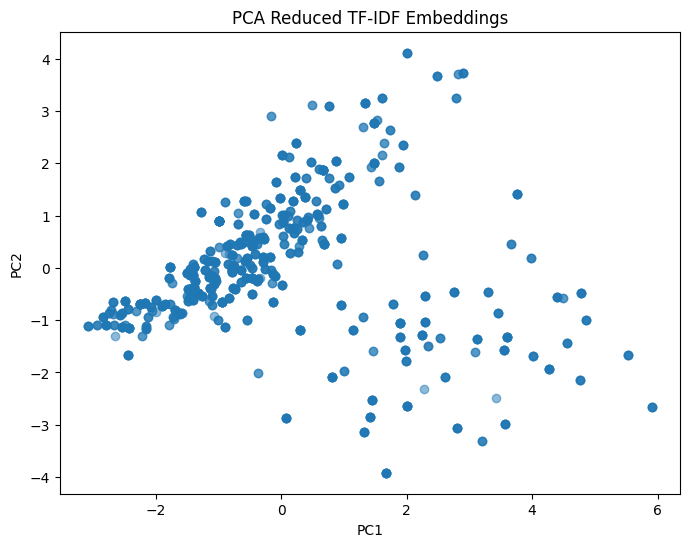

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced['PC1'], X_reduced['PC2'], alpha=0.5)
plt.title('PCA Reduced TF-IDF Embeddings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

BERT

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
embedding_df_bert = pd.read_csv('keyword_bert.csv')

In [64]:
# Khởi tạo PCA để giảm xuống 2 chiều (hoặc 3 nếu muốn trực quan hóa 3D)
pca = PCA(n_components=2)  # Sử dụng 2 chiều cho trực quan hóa 2D
reduced_embeddings = pca.fit_transform(embedding_df_bert)

In [67]:
reduced_embeddings_df = pd.DataFrame(reduced_embeddings, columns=['PC1', 'PC2'])
#reduced_embeddings_df.to_csv('reduce_bert.csv')

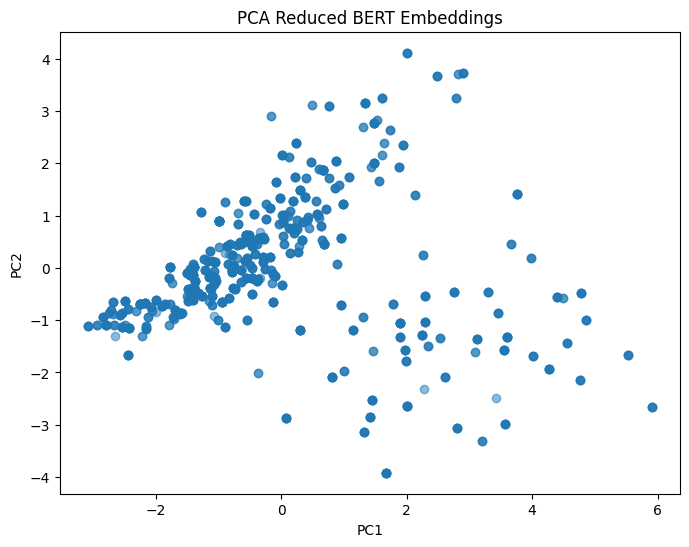

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_df['PC1'], reduced_embeddings_df['PC2'], alpha=0.5)
plt.title('PCA Reduced BERT Embeddings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

T5

In [52]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [69]:
embedding_df_t5 = pd.read_csv('keyword_t5.csv')

In [79]:
Y = embedding_df_t5.values 

In [77]:
Y = embedding_df_t5.values 

pca = PCA(n_components=2)
Y_reduced = pca.fit_transform(Y)

# Chuyển đổi về DataFrame để dễ dàng xử lý sau này
df_reduced = pd.DataFrame(data=Y_reduced, columns=[f'PC{i+1}' for i in range(2)])

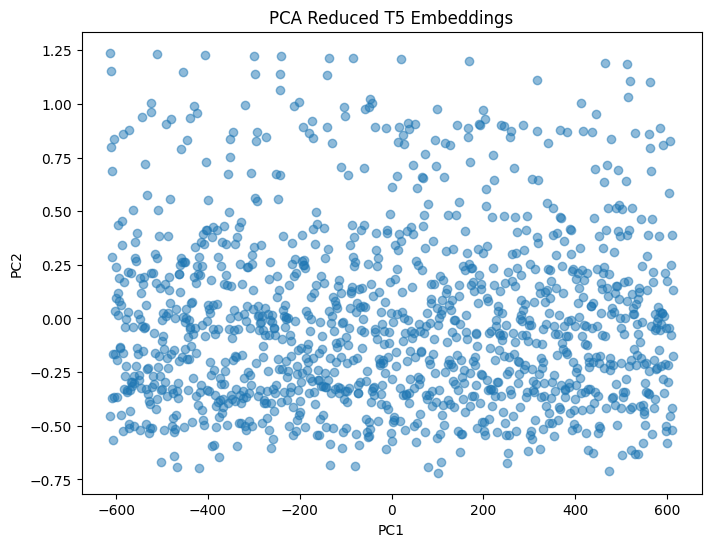

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], alpha=0.5)
plt.title('PCA Reduced T5 Embeddings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()